In [1]:
import torch
import torch.optim as optim
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix
import seaborn
import csv

import dataset
import datasplit
import model.models as models
import trainer
import utils

In [2]:
models_folder = '../../saved/models'
model_name = '20201025_fxnet_poly_rnd_bg_best'
results_folder = '../../saved/results'
results_subfolder = '20201025_fxnet_poly_rnd_bg'

In [3]:
# load model
fxnet = torch.load('%s/%s' % (models_folder, model_name), map_location=torch.device('cpu'))

In [4]:
all_train_losses = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'all_train_losses.npy')), allow_pickle=True)
all_train_correct = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'all_train_correct.npy')), allow_pickle=True)
best_train_results = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'best_train_results.npy')), allow_pickle=True)

all_val_losses = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'all_val_losses.npy')), allow_pickle=True)
all_val_correct = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'all_val_correct.npy')), allow_pickle=True)
best_val_results = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'best_val_results.npy')), allow_pickle=True)

all_test_losses = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'all_test_losses.npy')), allow_pickle=True)
all_test_correct = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'all_test_correct.npy')), allow_pickle=True)
best_test_results = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'best_test_results.npy')), allow_pickle=True)

fx_labels = np.load(file=('%s/%s/%s' % (results_folder, results_subfolder, 'fx_labels.npy')), allow_pickle=True)

In [5]:
train_set_size = best_train_results.shape[0]
val_set_size = best_val_results.shape[0]
test_set_size = best_test_results.shape[0]

In [22]:
test_set_size

26000

In [6]:
# BEST RESULTS
print('Accuracy: ', 100 * max(all_train_correct) / train_set_size)
print('Epoch: ', np.argmax(all_train_correct))
print()
print('Accuracy: ', 100 * max(all_val_correct) / val_set_size)
print('Epoch: ', np.argmax(all_val_correct))
print()
print('Accuracy: ', 100 * max(all_test_correct) / test_set_size)
print('Epoch: ', np.argmax(all_test_correct))
print()

Accuracy:  92.66239316239316
Epoch:  32

Accuracy:  91.48076923076923
Epoch:  18

Accuracy:  91.38846153846154
Epoch:  18



In [7]:
# # LOSS
# epochs = range(0, len(all_train_losses))
# plt.figure(figsize=(8,6))
# plt.grid(b=None, which='major', axis='both')
# plt.plot(epochs, all_train_losses, 'b', label='Train loss')
# plt.plot(epochs, all_val_losses, 'r', label='Validation loss')
# plt.plot(epochs, all_test_losses, 'g', label='Test loss')
# plt.title('Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [8]:
# # NORMALISED LOSS
# epochs = range(0, len(all_train_losses))
# plt.figure(figsize=(8,6))
# plt.grid(b=None, which='major', axis='both')
# plt.plot(epochs, np.array(all_train_losses) / max(all_train_losses), 'b', label='Train loss')
# plt.plot(epochs, np.array(all_val_losses) / max(all_val_losses), 'r', label='Validation loss')
# plt.plot(epochs, np.array(all_test_losses) / max(all_test_losses), 'g', label='Test loss')
# plt.title('Normalised Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [9]:
# # ACCURACY
# all_train_perc_correct = 100 * np.array(all_train_correct) / train_set_size
# all_val_perc_correct = 100 * np.array(all_val_correct) / val_set_size
# all_test_perc_correct = 100 * np.array(all_test_correct) / test_set_size
# epochs = range(0, len(all_train_losses))
# plt.figure(figsize=(8,6))
# plt.grid(b=None, which='major', axis='both')
# plt.plot(epochs, all_train_perc_correct, 'b', label='Train loss')
# plt.plot(epochs, all_val_perc_correct, 'r', label='Validation loss')
# plt.plot(epochs, all_test_perc_correct, 'g', label='Test loss')
# plt.title('Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [10]:
best_train_results[0]

array(['117521', 'P94-46120-TS9-D10T3.8-41413', '11', '11'], dtype='<U28')

In [11]:
# CONFUSION MATRICES

# Find best performance epoch based on validation
# Extract results from training and test for that epoch
best_val = 100 * max(all_val_correct) / val_set_size
best_val_idx = np.argmax(all_val_correct)

print("Best Validation Accuracy: ",best_val, "at epoch ", best_val_idx)
print("Training Accuracy: ", 100 * all_train_correct[best_val_idx] / train_set_size)
print("Test Accuracy: ", 100 * all_test_correct[best_val_idx] / test_set_size)

# Confusion matrices for best validation epoch
# extract predictions and targets vectors
train_preds = best_train_results[:, 2]
train_targets = best_train_results[:, 3]
val_preds = best_val_results[:, 2]
val_targets = best_val_results[:, 3]
test_preds = best_test_results[:, 2]
test_targets = best_test_results[:, 3]

# calculate conf. matrix
train_cm = confusion_matrix(y_true=train_targets, y_pred=train_preds, labels=['0','1','2','3','4','5','6','7','8','9','10','11','12'])
val_cm = confusion_matrix(y_true=val_targets, y_pred=val_preds, labels=['0','1','2','3','4','5','6','7','8','9','10','11','12'])
test_cm = confusion_matrix(y_true=test_targets, y_pred=test_preds, labels=['0','1','2','3','4','5','6','7','8','9','10','11','12'])

Best Validation Accuracy:  91.48076923076923 at epoch  18
Training Accuracy:  91.97115384615384
Test Accuracy:  91.38846153846154


In [12]:
# # Train CM
# plt.figure(figsize=(1,8))
# plt.rcParams.update({'font.size': 12})
# utils.plot_confusion_matrix(train_cm, fx_labels, normalize=True, title='FxNet - train confusion matrix')
# # plt.savefig('%s/%s/%s' % (results_folder, results_subfolder, 'fxnet_train_cm_norm.svg'))

In [13]:
# plt.figure(figsize=(8,8))
# plt.rcParams.update({'font.size': 10})
# utils.plot_confusion_matrix(val_cm, fx_labels, normalize=True, title='FxNet - validation confusion matrix')
# # plt.savefig('%s/%s/%s' % (results_folder, results_subfolder, 'fxnet_val_cm_norm.svg'))

Normalized confusion matrix


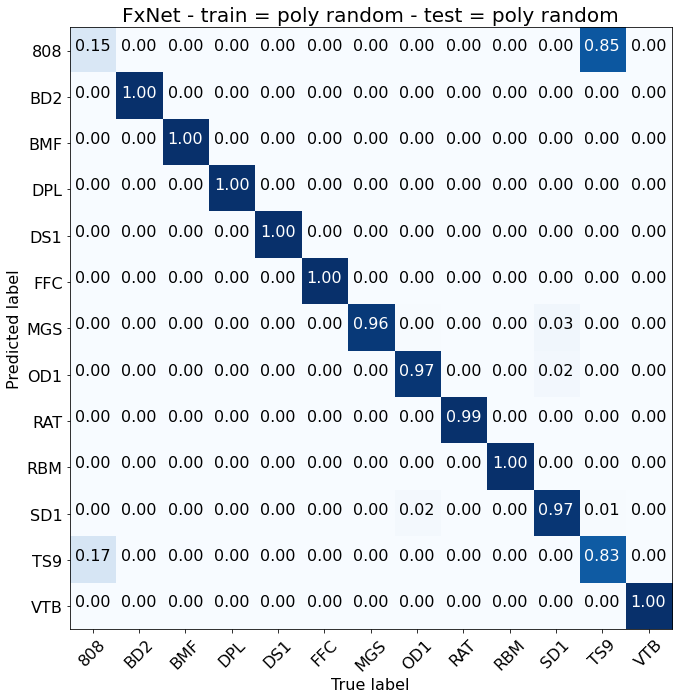

In [23]:
# Test CM
plt.figure(figsize=(10,10))
utils.plot_confusion_matrix(test_cm, fx_labels, normalize=True, title='FxNet - train = mono - test = mono')
plt.title('FxNet - train = poly random - test = poly random', fontsize=20)
plt.xlabel('True label', fontsize=16)
plt.ylabel('Predicted label', fontsize=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('font', size=16)   
plt.tight_layout()
plt.savefig('%s/%s/%s' % (results_folder, 'figures', 'fxnet_polyrnd_polyrnd_cm.eps'), format='eps')

### TEST on POLY

In [16]:
dataset_poly = dataset.FxDataset(
                            root='/Volumes/Macintosh HD/DATASETS/GUITAR-FX/Poly',
                            excl_folders=['MT2'], 
                            spectra_folder='mel_22050_1024_512', 
                            processed_settings_csv='proc_settings.csv',
                            max_num_settings=3,
                            transform=transforms.Compose([transforms.ToTensor()])
                            )
dataset_poly.init_dataset()
# dataset.generate_mel()

# split
# set test_train_split=0.0 and val_train_split=0.0 to test pre-trained model
split_poly = datasplit.DataSplit(dataset_poly, test_train_split=0.0, val_train_split=0.0, shuffle=True)

# loaders
_, _, test_loader_poly = split_poly.get_split(batch_size=100)

In [17]:
len(dataset_poly)

83160

In [18]:
test_poly_loss, test_poly_correct, test_poly_results = trainer.test_fx_net(
        model=fxnet, 
        test_loader=test_loader_poly, 
        test_sampler=split_poly.test_sampler,
        loss_function=nn.CrossEntropyLoss(), 
        device='cpu'
    )

====> Test Loss: 423.8952	 Avg Loss: 0.0051	Correct: 69965/83160	Percentage Correct: 84.13


In [19]:
test_poly_results_npy = np.array(test_poly_results)

test_poly_preds = test_poly_results_npy[:, 2]
test_poly_targets = test_poly_results_npy[:, 3]

# calculate conf. matrix
test_poly_cm = confusion_matrix(y_true=test_poly_targets, y_pred=test_poly_preds, labels=['0','1','2','3','4','5','6','7','8','9','10','11','12'])

Normalized confusion matrix


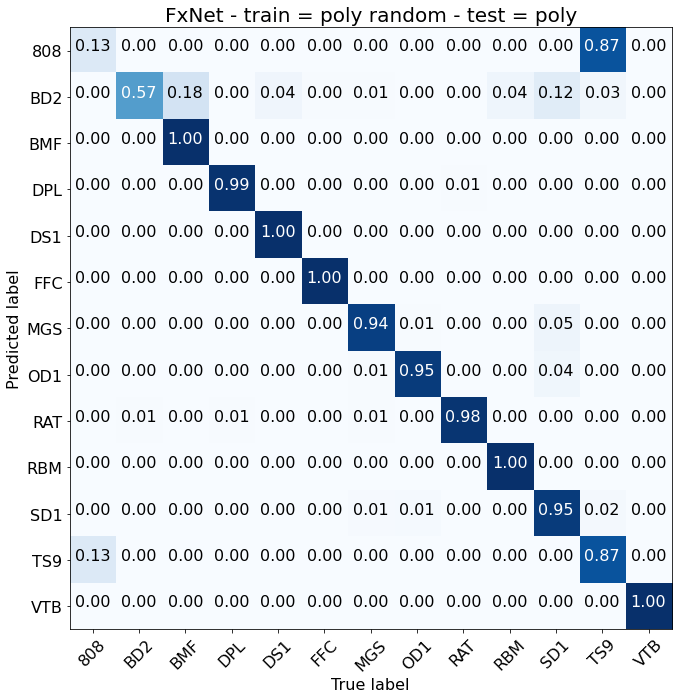

In [24]:
# Test CM
plt.figure(figsize=(10,10))
utils.plot_confusion_matrix(test_poly_cm, fx_labels, normalize=True, title='FxNet - train = poly rnd bg - test = poly')
plt.title('FxNet - train = poly random - test = poly', fontsize=20)
plt.xlabel('True label', fontsize=16)
plt.ylabel('Predicted label', fontsize=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('font', size=16) 
plt.tight_layout()
# plt.savefig('%s/%s/%s' % (results_folder, 'figures', 'fxnet_polyrnd_poly_cm.eps'), format='eps')

### TEST on MONO RANDOM BIG

In [22]:
# dataset
dataset_mono_rnd = dataset.FxDataset(
                            root='/Volumes/Macintosh HD/DATASETS/GUITAR-FX/Mono_Random_Bg',
                            excl_folders=['NoFX_mono_preprocessed', 'MT2'], 
                            spectra_folder='mel_22050_1024_512', 
                            processed_settings_csv='proc_settings.csv',
                            max_num_settings=3,
                            transform=transforms.Compose([transforms.ToTensor()])
                            )

dataset_mono_rnd.init_dataset()
# dataset_mono_rnd.generate_mel()

# split
# set test_train_split=0.0 and val_train_split=0.0 to test pre-trained model
split_mono_rnd = datasplit.DataSplit(dataset_mono_rnd, test_train_split=0.0, val_train_split=0.0, shuffle=True)

# loaders
_, _, test_loader_mono_rnd = split_mono_rnd.get_split(batch_size=100)

In [24]:
len(dataset_mono_rnd)

130000

In [25]:
test_mono_rnd_loss, test_mono_rnd_correct, test_mono_rnd_results = trainer.test_fx_net(
        model=fxnet, 
        test_loader=test_loader_mono_rnd, 
        test_sampler=split_mono_rnd.test_sampler,
        loss_function=nn.CrossEntropyLoss(), 
        device='cpu'
    )

====> Test Loss: 46663.6223	 Avg Loss: 0.3590	Correct: 16405/130000	Percentage Correct: 12.62


In [26]:
test_mono_rnd_results_npy = np.array(test_mono_rnd_results)

test_mono_rnd_preds = test_mono_rnd_results_npy[:, 2]
test_mono_rnd_targets = test_mono_rnd_results_npy[:, 3]

# calculate conf. matrix
test_mono_rnd_cm = confusion_matrix(test_mono_rnd_targets, test_mono_rnd_preds)

Normalized confusion matrix


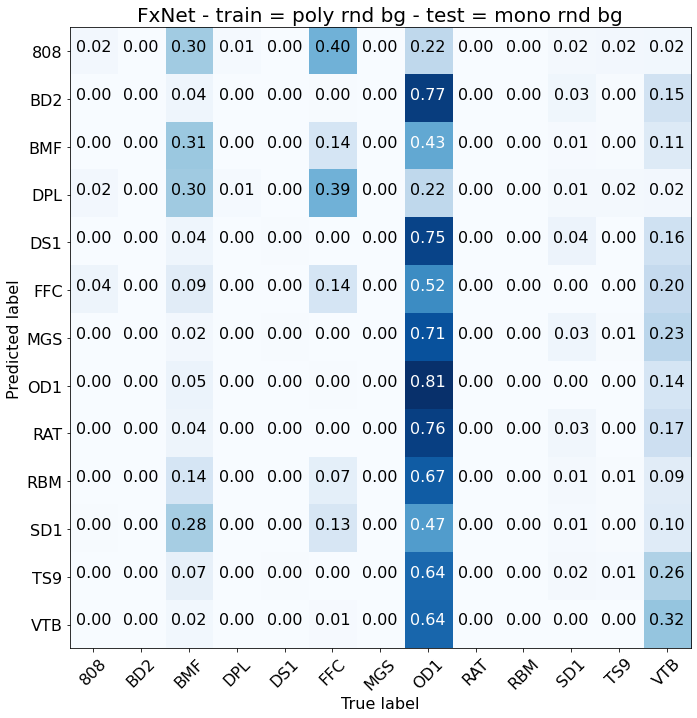

In [27]:
# Test CM
plt.figure(figsize=(10,10))
utils.plot_confusion_matrix(test_mono_rnd_cm, fx_labels, normalize=True, title='FxNet - train = mono - test = mono random')
plt.title('FxNet - train = poly rnd bg - test = mono rnd bg', fontsize=20)
plt.xlabel('True label', fontsize=16)
plt.ylabel('Predicted label', fontsize=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('font', size=16) 
# plt.savefig('%s/%s/%s' % (results_folder, results_subfolder, 'fxnet_test_cm.svg'))

### TEST on MONO

In [28]:
# dataset
dataset_mono = dataset.FxDataset(
                            root='/Volumes/STEVE/DATASETS/GUITAR-FX/Mono',
                            excl_folders=['NoFX_mono', 'NoFX_mono_preprocessed', 'MT2'], 
                            spectra_folder='mel_22050_1024_512', 
                            processed_settings_csv='proc_settings.csv',
                            max_num_settings=3,
                            transform=transforms.Compose([transforms.ToTensor()])
                            )
dataset_mono.init_dataset()
# dataset_poly_rnd.generate_mel()

# split
# set test_train_split=0.0 and val_train_split=0.0 to test pre-trained model
split_mono = datasplit.DataSplit(dataset_mono, test_train_split=0.0, val_train_split=0.0, shuffle=True)

# loaders
_, _, test_loader_mono = split_mono.get_split(batch_size=100)

In [29]:
len(dataset_mono)

123552

In [30]:
test_mono_loss, test_mono_correct, test_mono_results = trainer.test_fx_net(
        model=fxnet, 
        test_loader=test_loader_mono, 
        test_sampler=split_mono.test_sampler,
        loss_function=nn.CrossEntropyLoss(), 
        device='cpu'
    )

====> Test Loss: 32232.4175	 Avg Loss: 0.2609	Correct: 20336/123552	Percentage Correct: 16.46


In [39]:
test_mono_results_npy = np.array(test_mono_results)

test_mono_preds = test_mono_results_npy[:, 2]
test_mono_targets = test_mono_results_npy[:, 3]

# calculate conf. matrix
test_mono_cm = confusion_matrix(test_mono_targets, test_mono_preds)

Normalized confusion matrix


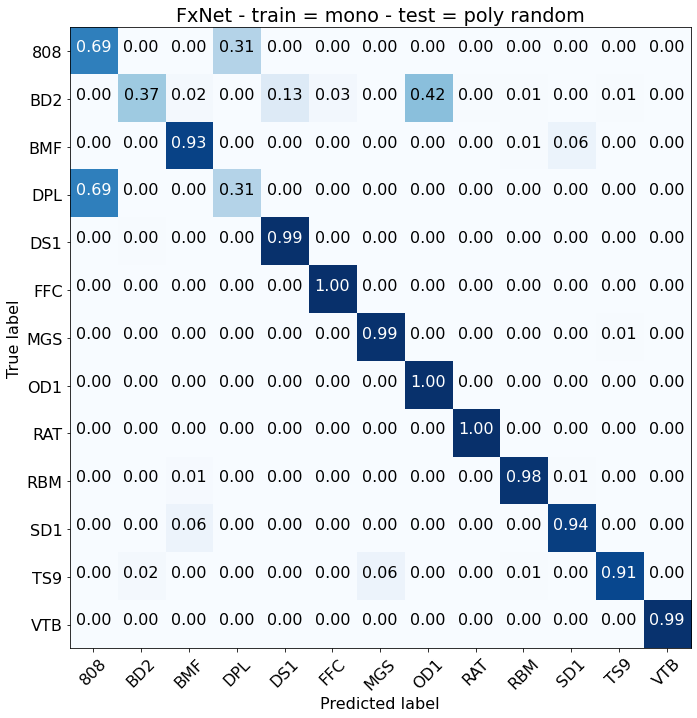

In [40]:
# Test CM
plt.figure(figsize=(10,10))
utils.plot_confusion_matrix(test_mono_cm, fx_labels, normalize=True, title='FxNet - train = mono - test = poly random')
# plt.savefig('%s/%s/%s' % (results_folder, results_subfolder, 'fxnet_test_cm.svg'))